In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np 

In [10]:
df= pd.read_csv('ToyotaCorolla.csv',encoding='ISO-8859-1')
df

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [14]:
df1=pd.concat([df.iloc[:,2:4],df.iloc[:,6:7],df.iloc[:,8:9],df.iloc[:,12:14],df.iloc[:,15:18]],axis=1)
df1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [19]:
df1.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [20]:
df1=df1.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
df1

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


# # Correlation Matrix

In [15]:
df1.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


# Scatterplot between variables along with histograms

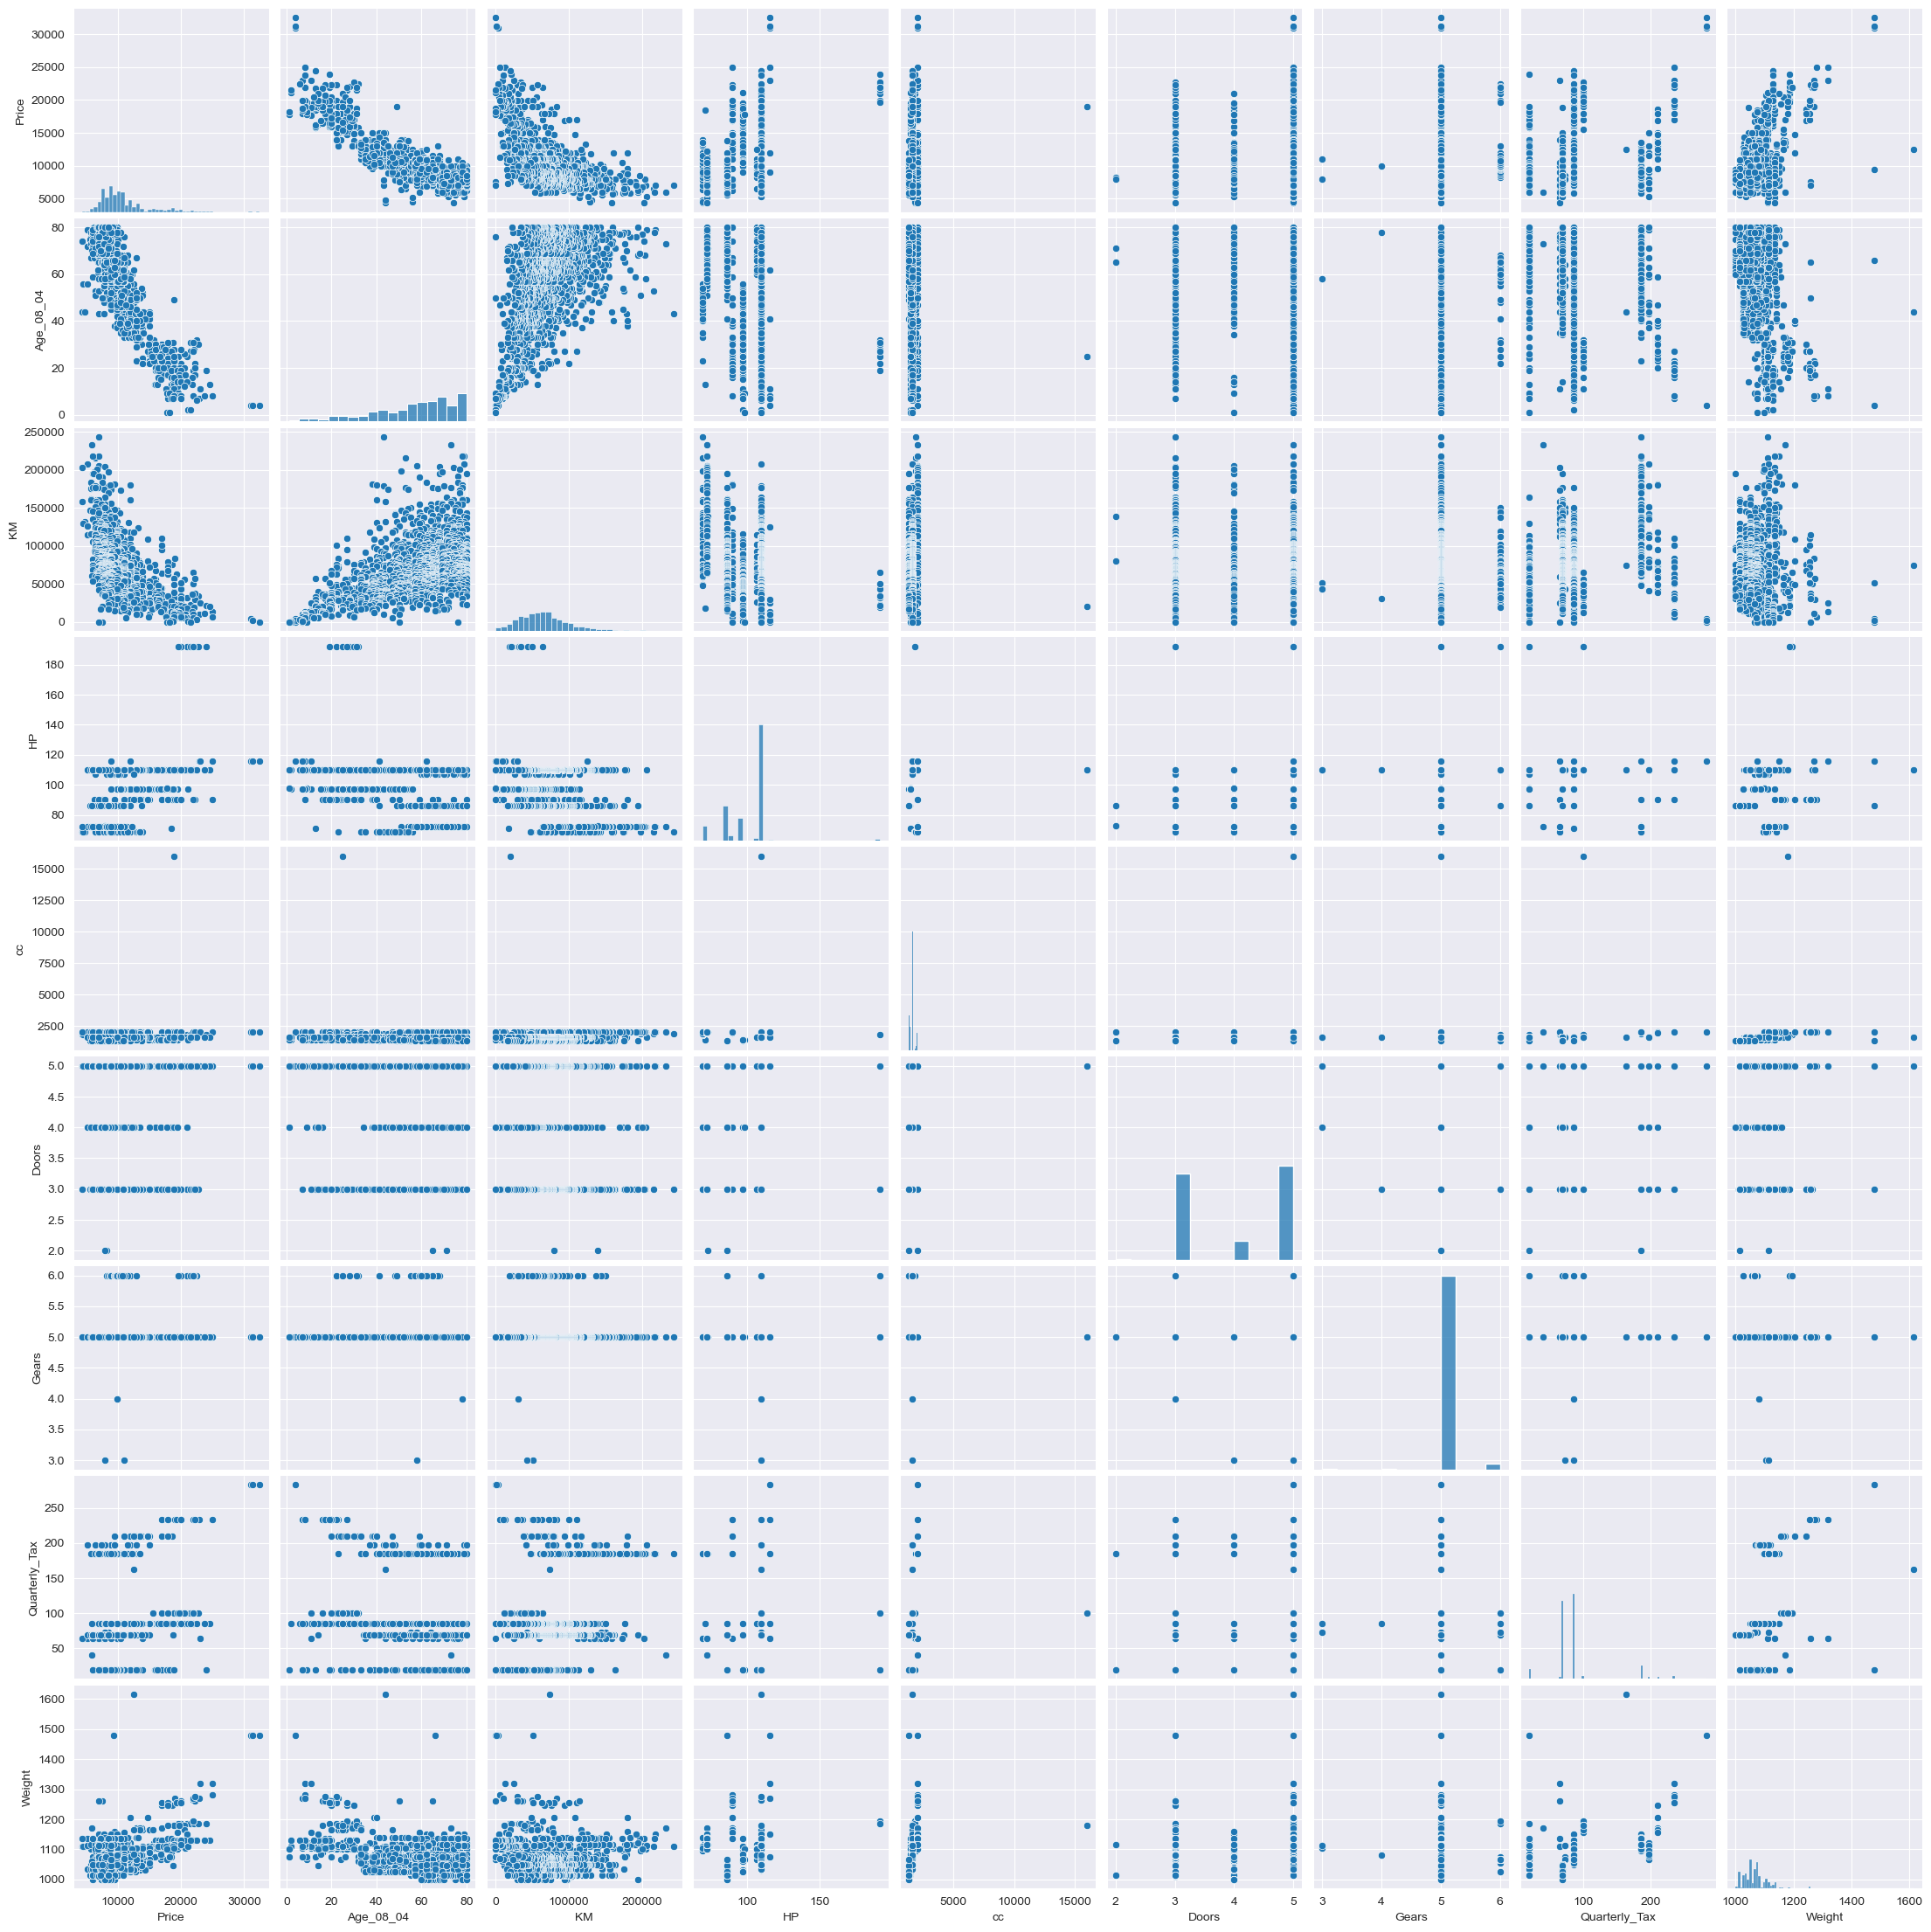

In [16]:
sns.set_style(style='darkgrid')
sns.pairplot(df1)
plt.show()

# Preparing a model

In [22]:
model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=df1).fit()

In [23]:
model.params

Intercept   -5573.106358
Age          -121.658402
KM             -0.020817
HP             31.680906
CC             -0.121100
Doors          -1.616641
Gears         594.319936
QT              3.949081
Weight         16.958632
dtype: float64

In [24]:
model.rsquared , model.rsquared_adj

(0.8637627463428192, 0.8629989775766963)

In [25]:
print(model.tvalues, '\n', model.pvalues)

Intercept    -3.948666
Age         -46.511852
KM          -16.621622
HP           11.241018
CC           -1.344222
Doors        -0.040410
Gears         3.016007
QT            3.014535
Weight       15.879803
dtype: float64 
 Intercept     8.241949e-05
Age          3.354724e-288
KM            7.538439e-57
HP            3.757218e-28
CC            1.790902e-01
Doors         9.677716e-01
Gears         2.606549e-03
QT            2.619148e-03
Weight        2.048576e-52
dtype: float64


In [27]:
slr_c=smf.ols('Price~CC',data=df1).fit()
slr_c.tvalues , slr_c.pvalues # CC has significant pvalue

(Intercept    24.694090
 CC            4.824822
 dtype: float64,
 Intercept    1.766912e-112
 CC            1.550808e-06
 dtype: float64)

In [28]:
slr_d=smf.ols('Price~Doors',data=df1).fit()
slr_d.tvalues , slr_d.pvalues # Doors has significant pvalue

(Intercept    19.258097
 Doors         7.141657
 dtype: float64,
 Intercept    1.094732e-73
 Doors        1.461237e-12
 dtype: float64)

In [30]:
mlr_cd=smf.ols('Price~CC+Doors',data=df1).fit()
mlr_cd.tvalues , mlr_cd.pvalues # CC & Doors have significant pvalue

(Intercept    12.620704
 CC            4.340400
 Doors         6.816153
 dtype: float64,
 Intercept    1.056885e-34
 CC           1.521992e-05
 Doors        1.373469e-11
 dtype: float64)

# Calculating VIF

In [32]:
rsq_age=smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight',data=df1).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~Age+HP+CC+Doors+Gears+QT+Weight',data=df1).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~Age+KM+CC+Doors+Gears+QT+Weight',data=df1).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_CC=smf.ols('CC~Age+KM+HP+Doors+Gears+QT+Weight',data=df1).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_DR=smf.ols('Doors~Age+KM+HP+CC+Gears+QT+Weight',data=df1).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_GR=smf.ols('Gears~Age+KM+HP+CC+Doors+QT+Weight',data=df1).fit().rsquared
vif_GR=1/(1-rsq_GR)

rsq_QT=smf.ols('QT~Age+KM+HP+CC+Doors+Gears+Weight',data=df1).fit().rsquared
vif_QT=1/(1-rsq_QT)

rsq_WT=smf.ols('Weight~Age+KM+HP+CC+Doors+Gears+QT',data=df1).fit().rsquared
vif_WT=1/(1-rsq_WT)

# Putting the values in Dataframe format
d1={'Variables':['Age','KM','HP','CC','Doors','Gears','QT','Weight'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_CC,vif_DR,vif_GR,vif_QT,vif_WT]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,Age,1.884620
1,KM,1.756905
2,HP,1.419422
3,CC,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,QT,2.311431
7,Weight,2.516420


# Residual Analysis

# Test for Normality of Residuals (Q-Q Plot)

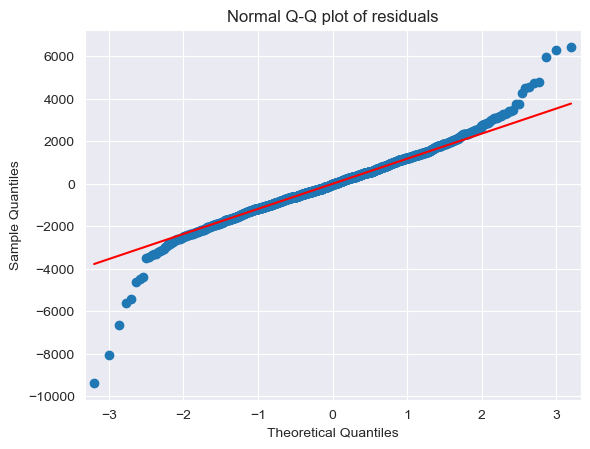

In [33]:
import statsmodels.api as smf
qqplot=smf.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [35]:
list(np.where(model.resid>6000))

[array([147, 523], dtype=int64)]

In [36]:
list(np.where(model.resid<-6000))

[array([221, 601, 960], dtype=int64)]

In [37]:
def standard_values(vals) : return (vals-vals.mean())/vals.std()

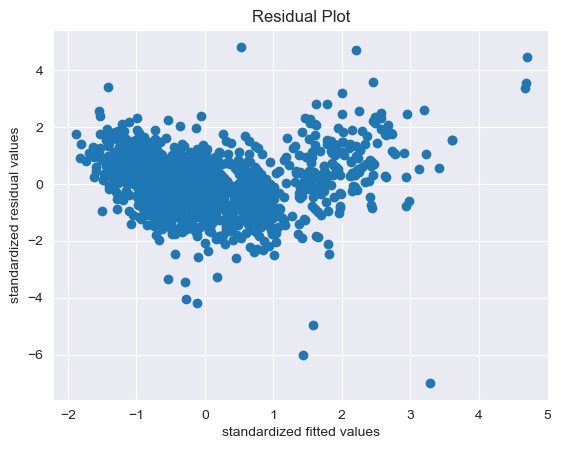

In [38]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

# Residual Vs Regressors

eval_env: 1


<Figure size 1500x800 with 0 Axes>

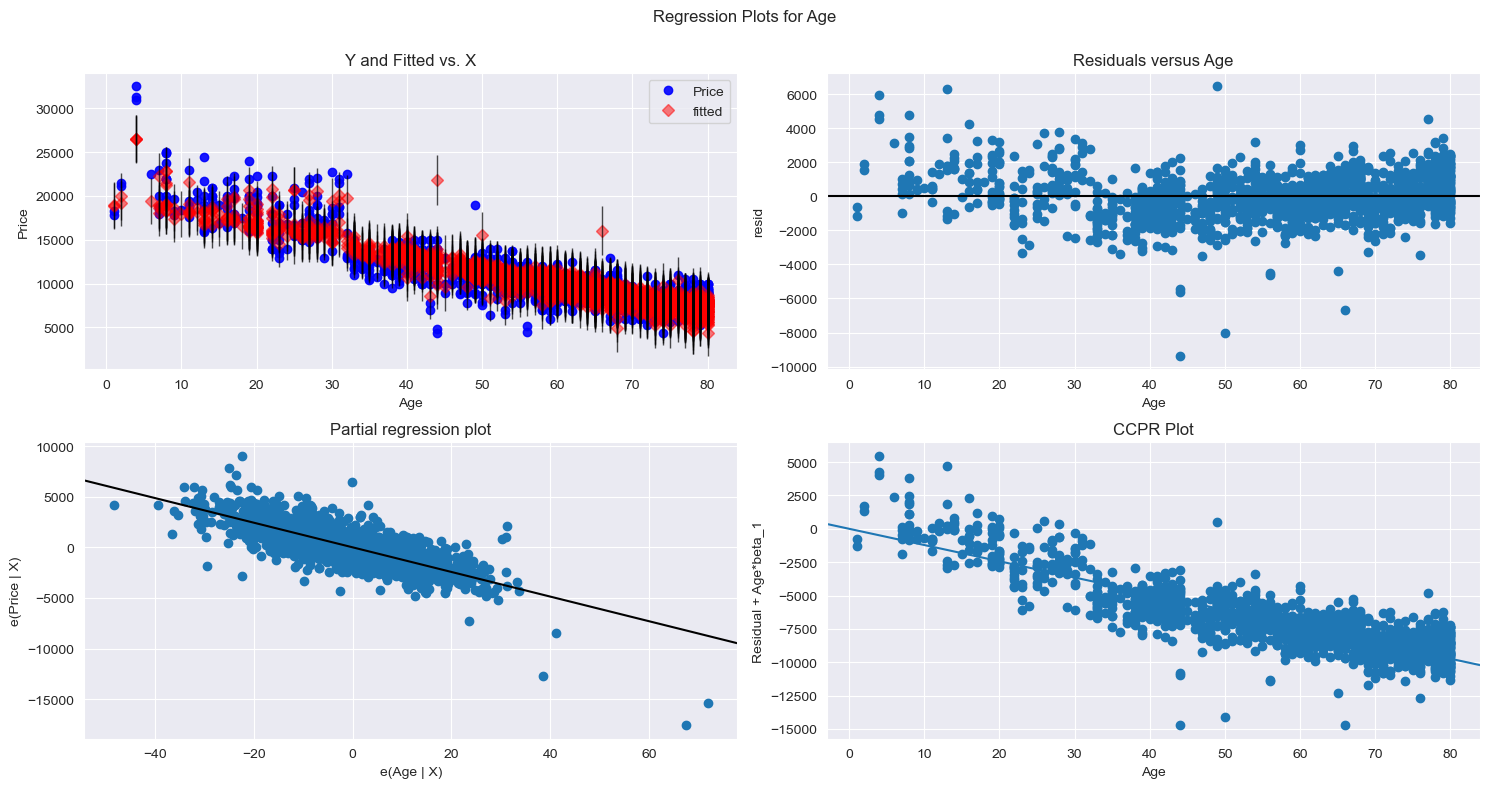

In [40]:
fig=plt.figure(figsize=(15,8))
smf.graphics.plot_regress_exog(model,'Age',fig=fig)
plt.show()

eval_env: 1


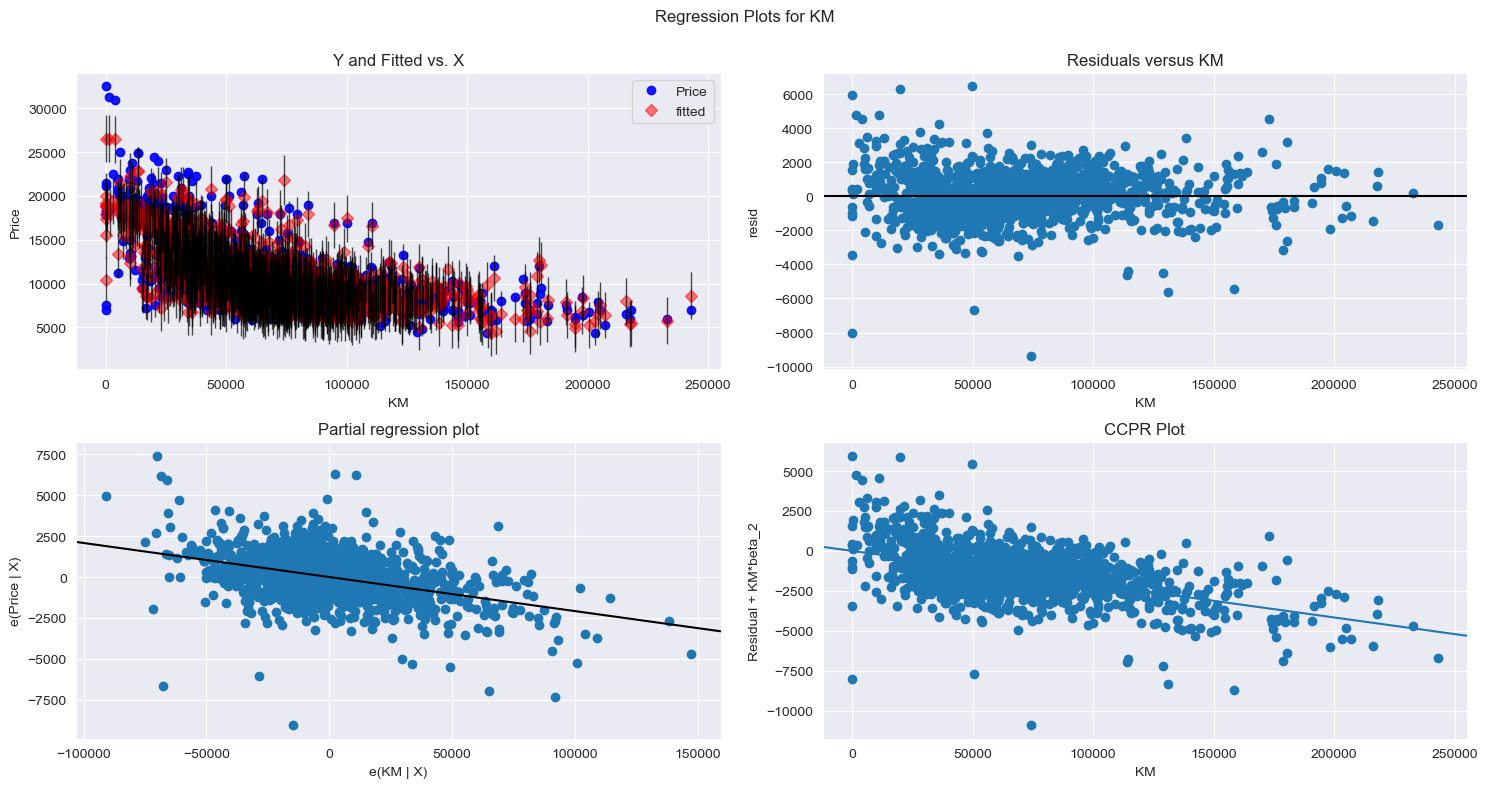

In [43]:
fig=plt.figure(figsize=(15,8))
smf.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

eval_env: 1


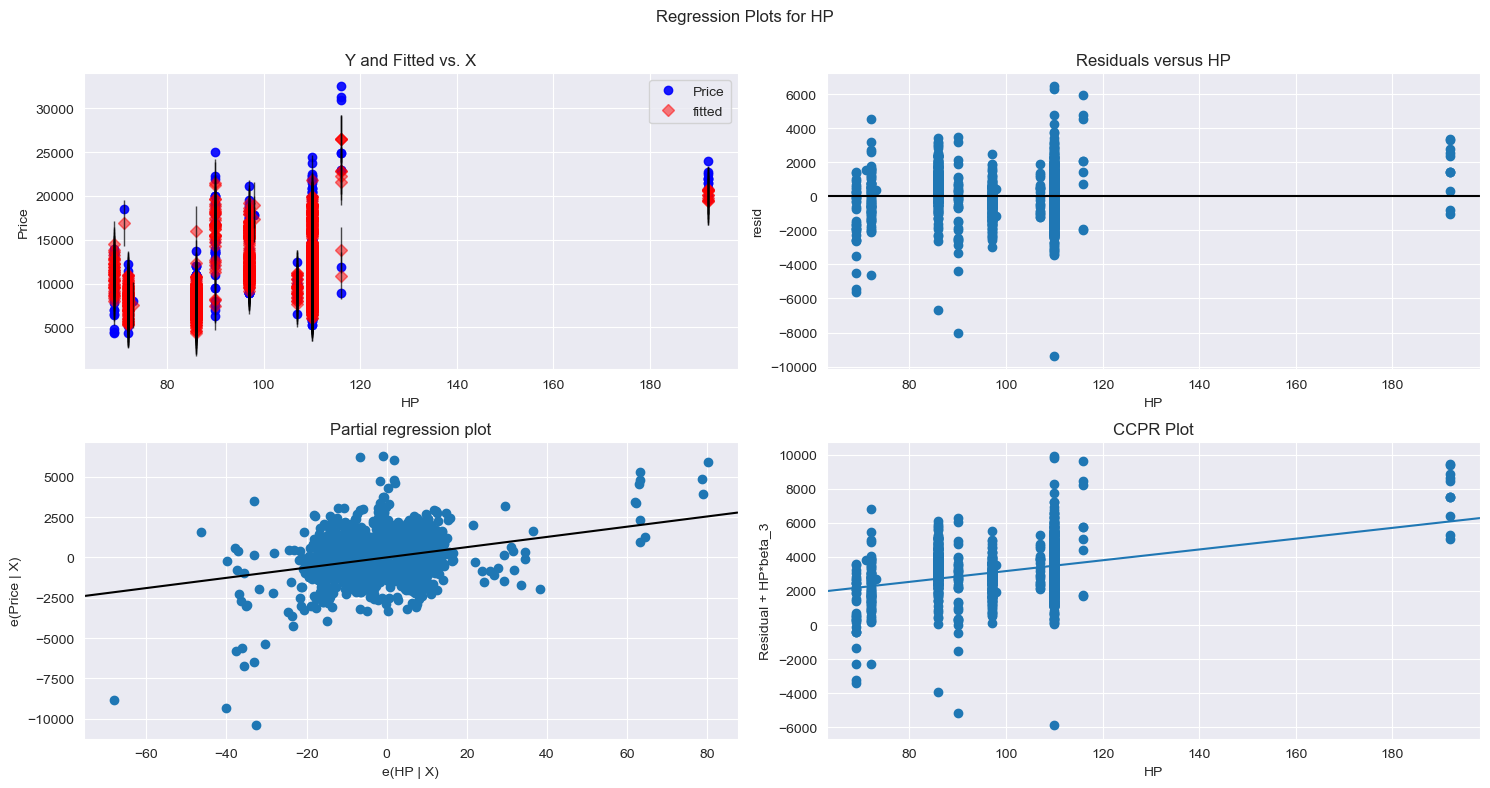

In [44]:
fig=plt.figure(figsize=(15,8))
smf.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

eval_env: 1


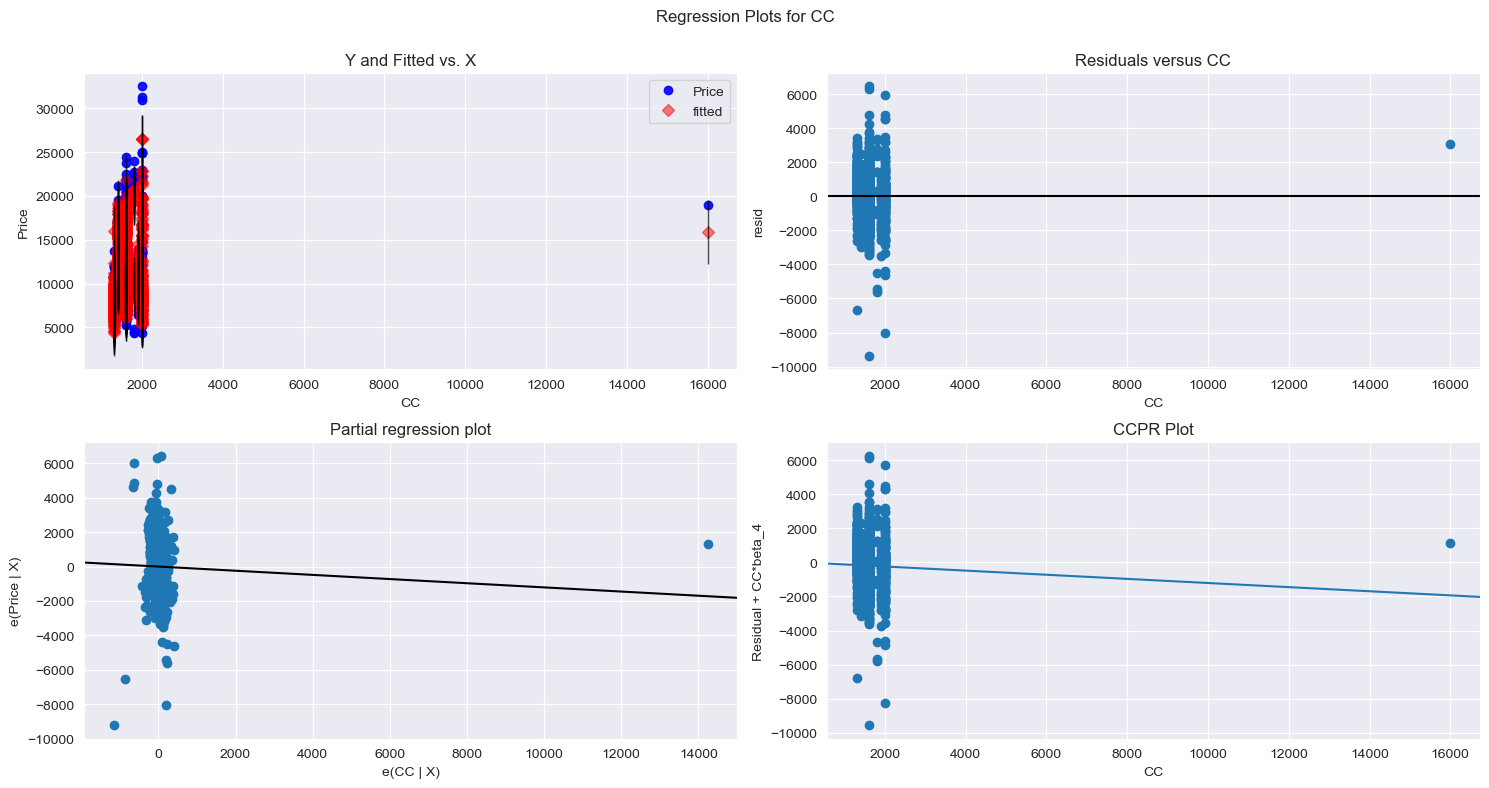

In [45]:
fig=plt.figure(figsize=(15,8))
smf.graphics.plot_regress_exog(model,'CC',fig=fig)
plt.show()

eval_env: 1


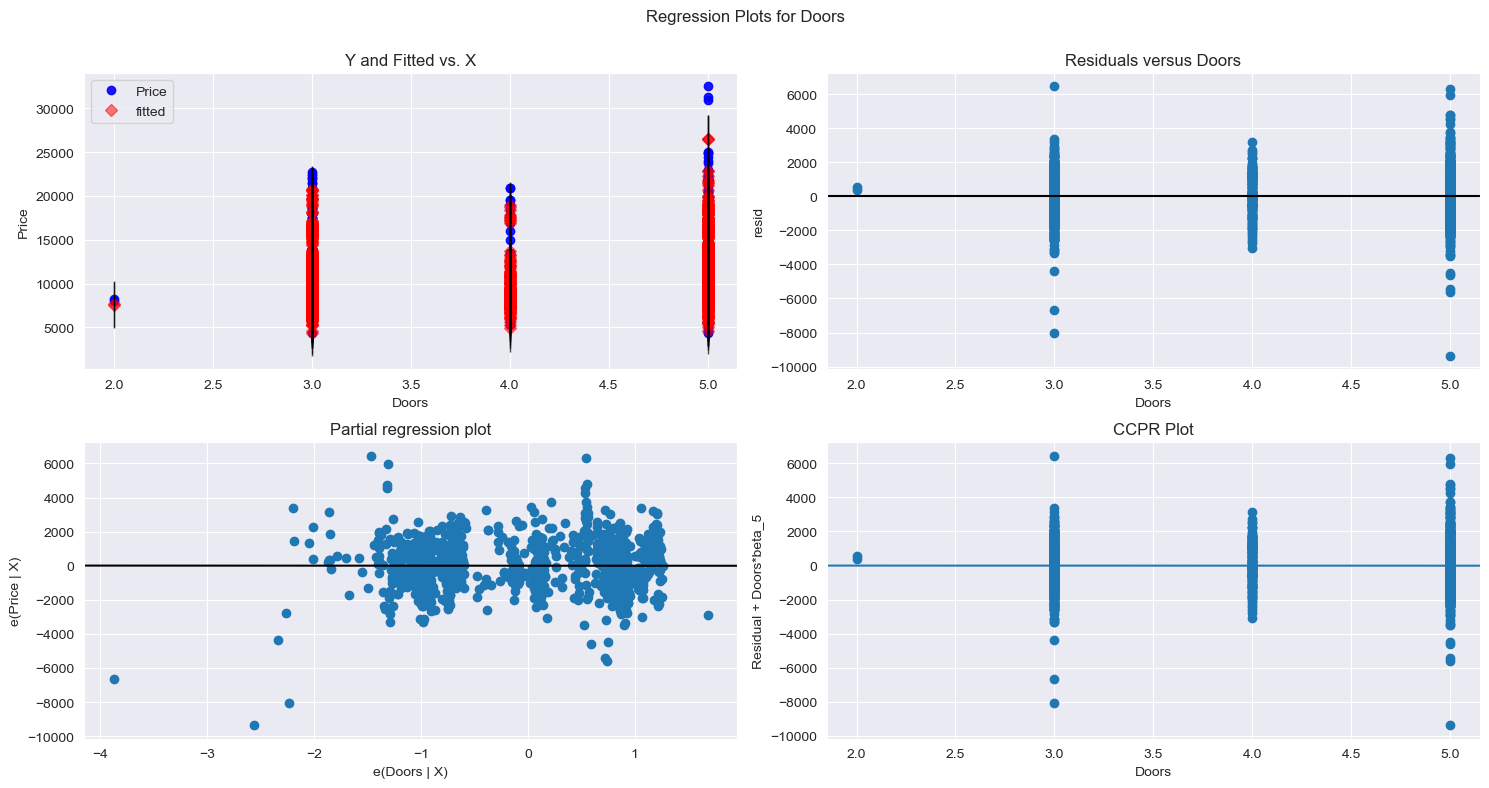

In [46]:
fig=plt.figure(figsize=(15,8))
smf.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

eval_env: 1


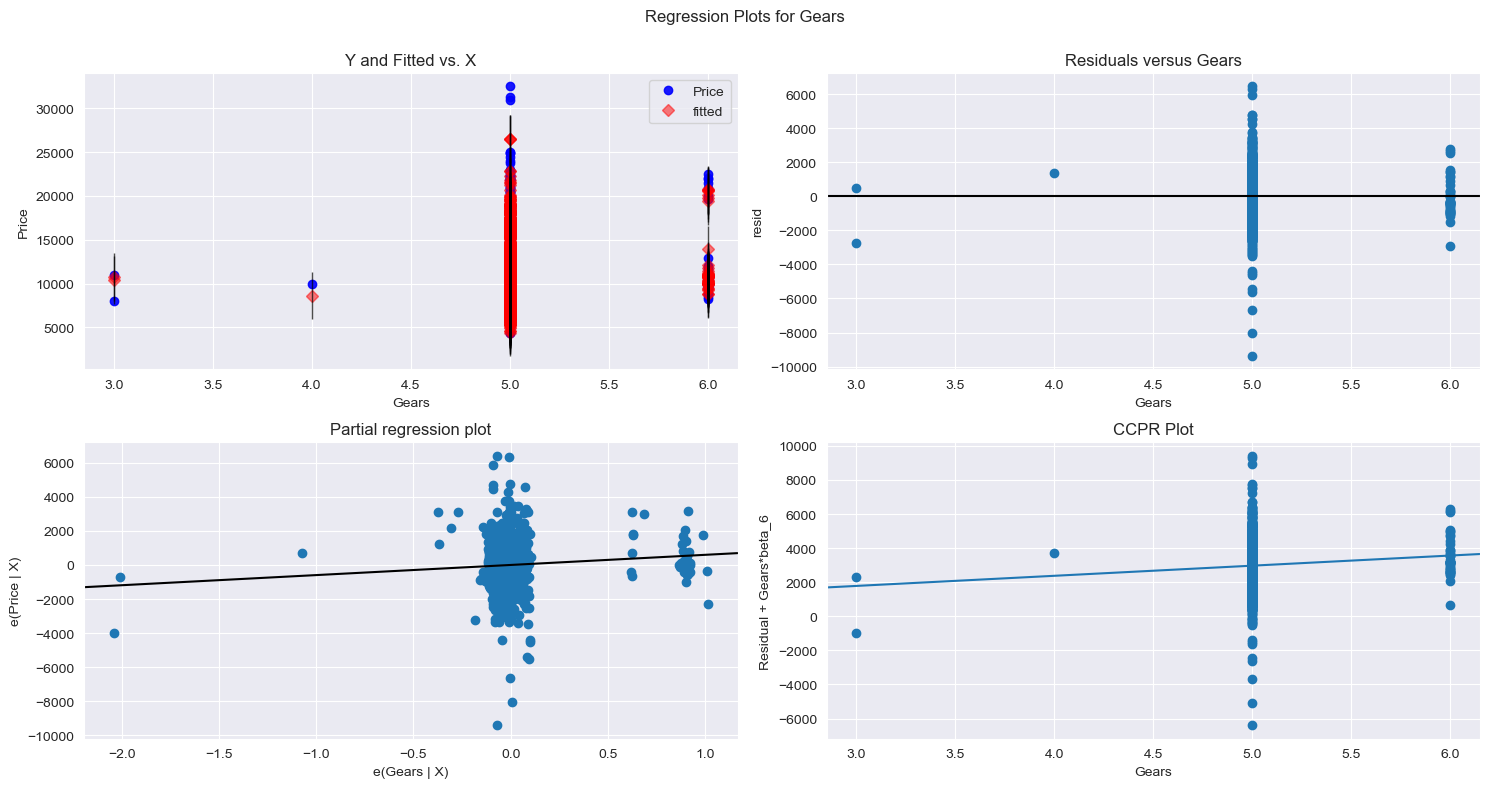

In [47]:
fig=plt.figure(figsize=(15,8))
smf.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

eval_env: 1


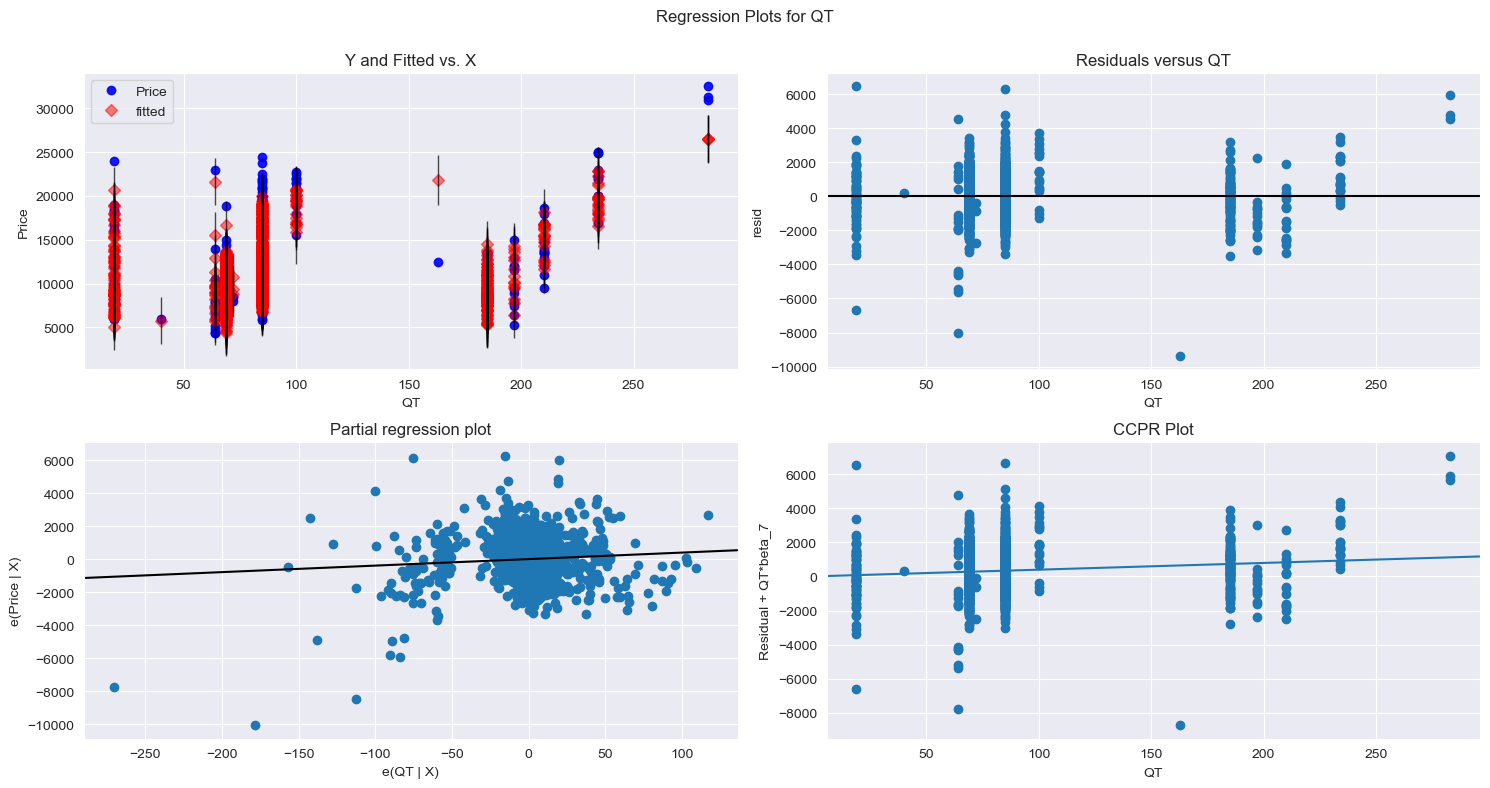

In [48]:
fig=plt.figure(figsize=(15,8))
smf.graphics.plot_regress_exog(model,'QT',fig=fig)
plt.show()

eval_env: 1


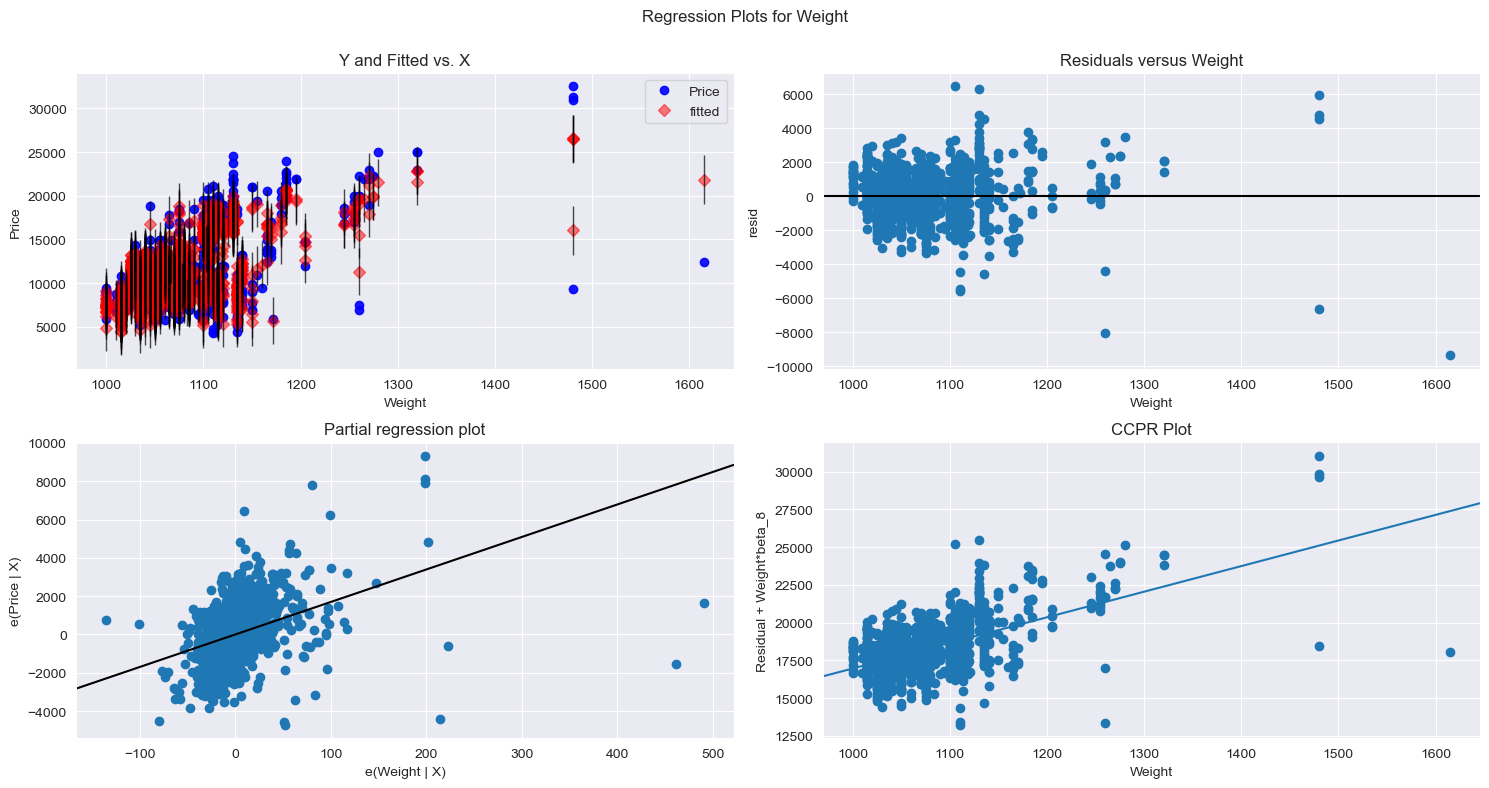

In [49]:
fig=plt.figure(figsize=(15,8))
smf.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

# Model Deletion Diagnostics¶

# Detecting Influencers/Outliers

# Cook’s Distance

In [50]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

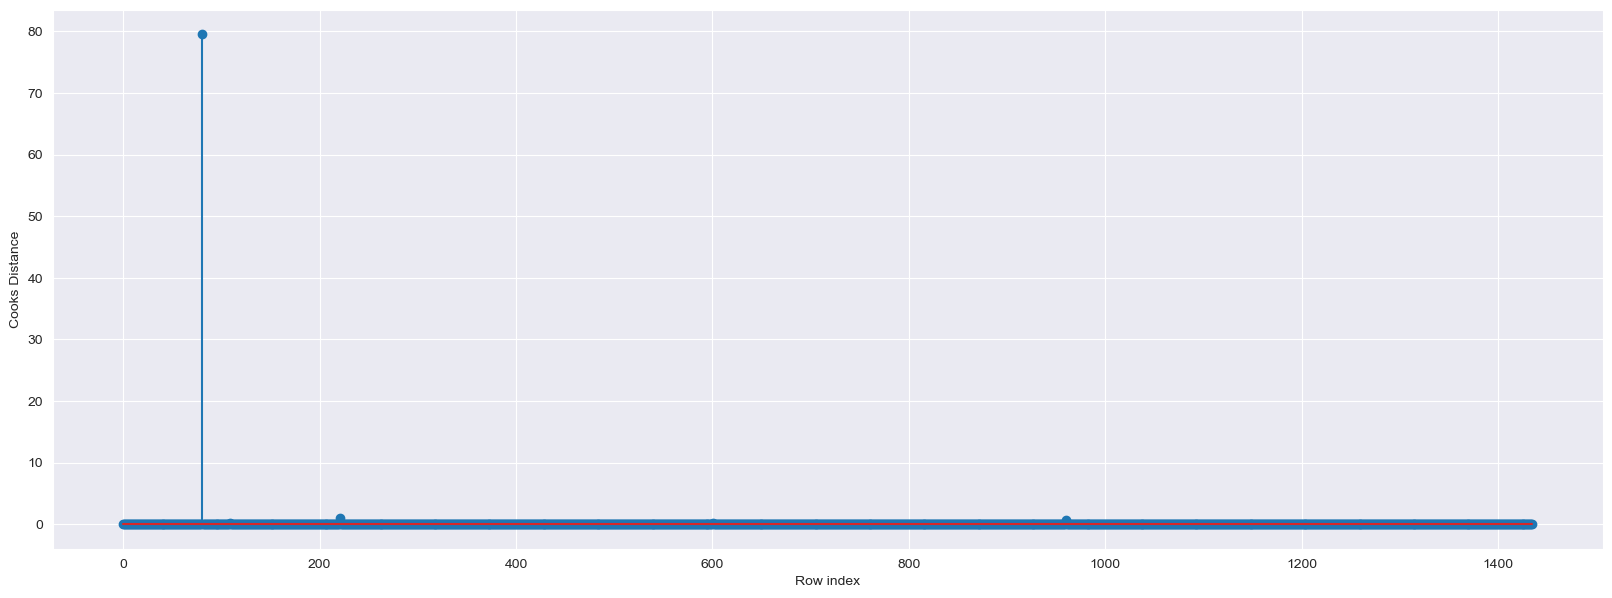

In [53]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [54]:
(np.argmax(c),np.max(c))

(80, 79.52010624143533)

# High Influence points

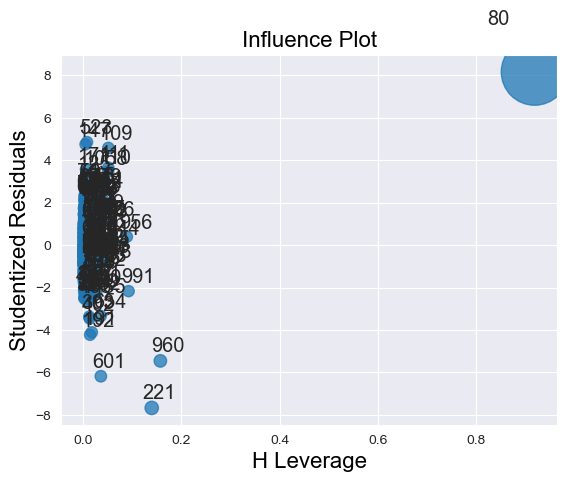

In [55]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [57]:
k=9
n=df1.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff 

0.020891364902506964

In [58]:
df1[df1.index.isin([80])] 

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


# Improving the model

In [72]:

df2=df1.drop(df1.index[80],axis=0).reset_index()


In [73]:
df2=df2.drop(['index'],axis=1)
df2

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


# Build Model

In [74]:
import statsmodels.formula.api as smf
f_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=df2).fit()

In [75]:
f_model.rsquared

0.8693790488655819

In [76]:
new_data=pd.DataFrame({'Age':12,"KM":40000,"HP":80,"CC":1300,"Doors":4,"Gears":5,"QT":69,"Weight":1012},index=[0])
new_data

,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,12,40000,80,1300,4,5,69,1012


In [77]:
f_model.predict(new_data)

0    14964.403777
dtype: float64

In [79]:
pred_y=f_model.predict(df2)
pred_y

0       16528.990607
1       16065.803813
2       16502.686471
3       16149.527067
4       15938.095051
            ...     
1430     8971.183912
1431     8435.722285
1432     8591.588786
1433     8713.828687
1434     9969.788925
Length: 1435, dtype: float64

# table containing R^2 value for each prepared model¶

In [80]:
d2={'Prep_Models':['Model','f_Model'],'Rsquared':[model.rsquared,f_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.863763
1,f_Model,0.869379
